In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
test_audio_file = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'

In [6]:
data, sampling_rate = librosa.load(test_audio_file,sr=None)

In [7]:
sampling_rate

16000

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


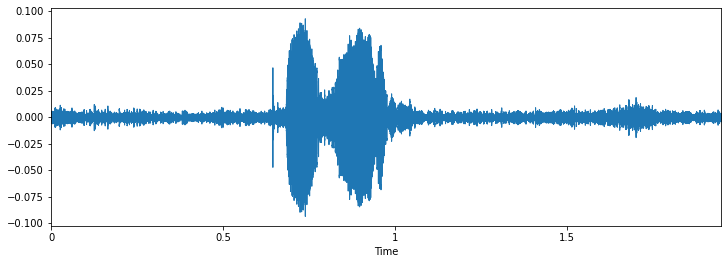

In [8]:
% pylab inline
import os
import pandas as pd
import glob
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr=sampling_rate)

(20, 61)


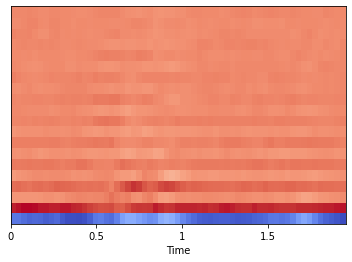

In [9]:
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

In [10]:
import re

# first test with one file
test_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/dialog/EmoEvaluation/Ses01F_impro01.txt'

In [11]:
file_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)

In [12]:
with open(test_path) as fptr:
    test_file_content = fptr.read()
    
info_lines = re.findall(file_regex, test_file_content)

In [13]:
for l in info_lines[1:10]:
    print(l.strip().split('\t'))

['[6.2901 - 8.2357]', 'Ses01F_impro01_F000', 'neu', '[2.5000, 2.5000, 2.5000]']
['[10.0100 - 11.3925]', 'Ses01F_impro01_F001', 'neu', '[2.5000, 2.5000, 2.5000]']
['[14.8872 - 18.0175]', 'Ses01F_impro01_F002', 'neu', '[2.5000, 2.5000, 2.5000]']
['[19.2900 - 20.7875]', 'Ses01F_impro01_F003', 'xxx', '[2.5000, 3.0000, 3.0000]']
['[21.3257 - 24.7400]', 'Ses01F_impro01_F004', 'xxx', '[2.5000, 3.0000, 2.5000]']
['[27.4600 - 31.4900]', 'Ses01F_impro01_F005', 'neu', '[2.5000, 3.5000, 2.0000]']
['[38.9650 - 43.5900]', 'Ses01F_impro01_F006', 'fru', '[2.0000, 3.5000, 3.5000]']
['[46.5800 - 52.1900]', 'Ses01F_impro01_F007', 'fru', '[2.5000, 3.5000, 3.5000]']
['[56.1600 - 58.8225]', 'Ses01F_impro01_F008', 'fru', '[2.0000, 3.5000, 3.5000]']


In [15]:
import re
import os


file_regex = re.compile(r'\[.+\]\n', re.IGNORECASE)

start_times, end_times, wav_file_names, emotions, vals, acts, doms = [], [], [], [], [], [], []

for sess in range(1, 6):
    emo_evaluation_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session{}/dialog/EmoEvaluation/'.format(sess)
    evaluation_files = [l for l in os.listdir(emo_evaluation_dir) if 'Ses' in l]
    for file in evaluation_files:
        with open(emo_evaluation_dir + file) as f:
            content = f.read()
        info_lines = re.findall(file_regex, content)
        for line in info_lines[1:]:  # the first line is a header
            start_end_time, wav_file_name, emotion, val_act_dom = line.strip().split('\t')
            start_time, end_time = start_end_time[1:-1].split('-')
            val, act, dom = val_act_dom[1:-1].split(',')
            val, act, dom = float(val), float(act), float(dom)
            start_time, end_time = float(start_time), float(end_time)
            start_times.append(start_time)
            end_times.append(end_time)
            wav_file_names.append(wav_file_name)
            emotions.append(emotion)
            vals.append(val)
            acts.append(act)
            doms.append(dom)

In [16]:
import pandas as pd

df_iemocap = pd.DataFrame(columns=['start_time', 'end_time', 'wav_file', 'emotion', 'val', 'act', 'dom'])

df_iemocap['start_time'] = start_times
df_iemocap['end_time'] = end_times
df_iemocap['wav_file'] = wav_file_names
df_iemocap['emotion'] = emotions
df_iemocap['val'] = vals
df_iemocap['act'] = acts
df_iemocap['dom'] = doms

df_iemocap.tail()

,start_time,end_time,wav_file,emotion,val,act,dom
10034,158.43,161.22,Ses05F_impro01_M020,fru,2.0,3.5,3.5
10035,163.35,167.67,Ses05F_impro01_M021,fru,2.0,3.5,4.0
10036,168.59,170.81,Ses05F_impro01_M022,xxx,3.0,3.5,4.0
10037,173.52,179.84,Ses05F_impro01_M023,fru,2.0,4.0,4.5
10038,181.24,184.62,Ses05F_impro01_M024,xxx,4.0,3.5,3.5


In [17]:
df_iemocap.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/df_iemocap.csv', index=False)

In [18]:
### Audio files

In [14]:
# Try for one file first
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [16]:
test_file_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/dialog/wav/Ses01F_impro01.wav'

y, sr = librosa.load(test_file_path,sr=None)
y, sr

(array([ 0.42692566,  0.17858887, -0.49665833, ..., -0.11756897,
        -0.49945068, -0.29483032], dtype=float32), 16000)

In [22]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [23]:
sr = 16000
audio_vectors = {}
for sess in range(1,6):  # using one session due to memory constraint, can replace [5] with range(1, 6)
    wav_file_path = '{}Session{}/dialog/wav/'.format(iemocap_dir, sess)
    orig_wav_files = os.listdir(wav_file_path)
    for orig_wav_file in tqdm(orig_wav_files):
        try:
            orig_wav_vector, _sr = librosa.load(wav_file_path + orig_wav_file, sr=sr)
            orig_wav_file, file_format = orig_wav_file.split('.')
            for index, row in labels_df[labels_df['wav_file'].str.contains(orig_wav_file)].iterrows():
                start_time, end_time, truncated_wav_file_name, emotion, val, act, dom = row['start_time'], row['end_time'], row['wav_file'], row['emotion'], row['val'], row['act'], row['dom']
                start_frame = math.floor(start_time * sr)
                end_frame = math.floor(end_time * sr)
                truncated_wav_vector = orig_wav_vector[start_frame:end_frame + 1]
                audio_vectors[truncated_wav_file_name] = truncated_wav_vector
        except:
            print('An exception occured for {}'.format(orig_wav_file))
    with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
        pickle.dump(audio_vectors, f)

 16%|█▌        | 5/31 [00:39<03:17,  7.59s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
 19%|█▉        | 6/31 [00:40<02:18,  5.53s/it]

An exception occured for Ses02F_script01_1.pk


100%|██████████| 31/31 [04:53<00:00,  9.45s/it]


In [24]:
# sess = 5
# with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_vectors_{}.pkl'.format(sess), 'wb') as f:
#         pickle.dump(audio_vectors, f)

In [25]:
import os
import pickle
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import librosa
import math
import random
import pandas as pd
import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [26]:
!pip install opensmile --upgrade

     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 635 kB 42.2 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 167 kB 47.1 MB/s 
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=169061 sha256=3263f5f841168f35ffcf0b6ce17871367a882770f26575d1380933da0f1a0c76
  Stored in directory: /root/.cache/pip/wheels/47/60/19/6d020fc92138ed1b113a18271e83ea4b5525fe770cb45b9a2e
Successfully built iso-639


In [27]:
data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed-new/'
labels_df_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_1.pkl'.format(data_dir)

In [28]:
labels_df = pd.read_csv(labels_df_path)
audio_vectors = pickle.load(open(audio_vectors_path, 'rb'))

In [29]:
random_file_name = list(audio_vectors.keys())[random.choice(range(len(audio_vectors.keys())))]
y = audio_vectors[random_file_name]
sr = 22050

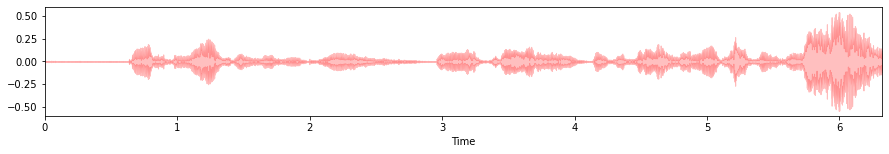

In [30]:
plt.figure(figsize=(15,2))
librosa.display.waveplot(y, sr=sr, max_sr=1000, alpha=0.25, color='r')

In [31]:
!pip install sox --upgrade

In [32]:
!apt -qq install -y sox

The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected pa

In [33]:
import opensmile
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

In [34]:
test_opensmile_file_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'

In [35]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [36]:
import joblib

In [37]:
#test_opensmile_df = smile.process_files(test_opensmile_file_path)
test_opensmile_df = smile.process_files(test_audio_file)

CalledProcessError: ignored

In [38]:
print('Signal mean = {:.5f}'.format(np.mean(abs(y))))
print('Signal std dev = {:.5f}'.format(np.std(y)))

Signal mean = 0.03081
Signal std dev = 0.05538


RMSE mean = 0.03915
RMSE std dev = 0.03909


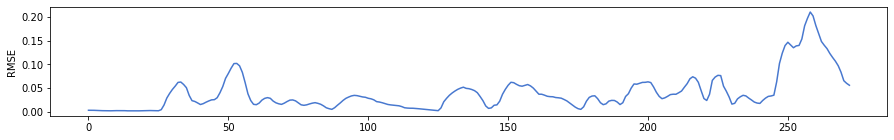

In [39]:
rmse = librosa.feature.rms(y + 0.0001)[0]
plt.figure(figsize=(15,2))
plt.plot(rmse)
plt.ylabel('RMSE')
print('RMSE mean = {:.5f}'.format(np.mean(rmse)))
print('RMSE std dev = {:.5f}'.format(np.std(rmse)))

In [40]:
from IPython.display import Audio
Audio(y, rate=22050)

In [41]:
silence = 0
for e in rmse:
    if e <= 0.4 * np.mean(rmse):
        silence += 1
print(silence/float(len(rmse)))

0.27106227106227104


In [42]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
np.mean(y_harmonic)

-4.7017005e-07

In [43]:
autocorr = librosa.core.autocorrelate(y)
np.max(autocorr)

427.4948501788833

In [44]:
cl = 0.45 * np.mean(abs(y))
center_clipped = []
for s in y:
    if s >= cl:
        center_clipped.append(s - cl)
    elif s <= -cl:
        center_clipped.append(s + cl)
    elif np.abs(s) < cl:
        center_clipped.append(0)
new_autocorr = librosa.core.autocorrelate(np.array(center_clipped))
np.max(new_autocorr)

328.75259500197194

In [45]:
audio_vectors[random_file_name]

array([ 0.00485624,  0.00306669,  0.002226  , ...,  0.00926164,
        0.00460277, -0.00664163], dtype=float32)

In [46]:
y

array([ 0.00485624,  0.00306669,  0.002226  , ...,  0.00926164,
        0.00460277, -0.00664163], dtype=float32)

In [47]:
mfccs = np.mean(librosa.feature.mfcc(y).T, axis=0)

In [48]:
mfccs

array([-327.14578   ,  147.44032   ,  -26.560673  ,   26.724588  ,
         -5.999137  ,    3.0911832 ,   -0.6775162 ,   -9.579028  ,
         -6.79306   ,   -7.1112843 ,    0.94543713,   -3.6951113 ,
          3.7884195 ,   -4.066933  ,   -2.4887035 ,   -2.0566707 ,
         -6.897782  ,   -0.7210671 ,   -6.384854  ,   -3.4324195 ],
      dtype=float32)

In [49]:
stft=np.abs(librosa.stft(y))
chroma=np.mean(librosa.feature.chroma_stft(S=stft).T,axis=0)

In [50]:
chroma

array([0.61129713, 0.6092529 , 0.57850105, 0.5909411 , 0.60985   ,
       0.5799276 , 0.5364086 , 0.5078257 , 0.47375557, 0.5188377 ,
       0.5615939 , 0.59885085], dtype=float32)

In [51]:
mel=np.mean(librosa.feature.melspectrogram(y).T,axis=0)

In [52]:
mel.shape

(128,)

In [53]:
result_loc = np.array([])

In [54]:
result_loc=np.hstack((result_loc, mfccs,chroma,mel))

In [55]:
result_loc.shape

(160,)

In [56]:
columns = ['wav_file', 'label', 'sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std']
df_features = pd.DataFrame(columns=columns)

In [57]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed-new/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [58]:
def extract_mfcc_chroma_mel(audio_vectors, wav_file, label, mfcc, chroma, mel, sample_rate = 22050):
        if chroma:
            stft=np.abs(librosa.stft(audio_vectors))
        result=np.array([])
        result=np.hstack((result,wav_file,label))
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=audio_vectors, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(audio_vectors, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [59]:
result_y = extract_mfcc_chroma_mel(y,random_file_name, 1, mfcc=True,chroma=True,mel=True)

In [60]:
result_y

array(['Ses01F_script03_1_M033', '1', '-327.14578', '147.44032',
       '-26.560673', '26.724588', '-5.999137', '3.0911832', '-0.6775162',
       '-9.579028', '-6.79306', '-7.1112843', '0.94543713', '-3.6951113',
       '3.7884195', '-4.066933', '-2.4887035', '-2.0566707', '-6.897782',
       '-0.7210671', '-6.384854', '-3.4324195', '-3.107901', '-3.3839235',
       '-4.019568', '-4.614876', '-0.5861781', '-4.100338', '-0.7730058',
       '0.4423812', '-1.5574726', '0.7582005', '0.43827847',
       '-0.67050034', '-1.4236393', '-2.4331295', '-2.616943',
       '-0.8459874', '-0.5555658', '0.57527673', '1.3641379', '0.3072052',
       '0.61129713', '0.6092529', '0.57850105', '0.5909411', '0.60985',
       '0.5799276', '0.5364086', '0.5078257', '0.47375557', '0.5188377',
       '0.5615939', '0.59885085', '0.01975136', '0.027122768',
       '0.020786919', '0.17389469', '0.9290019', '3.6453242', '3.9500535',
       '2.7661896', '3.3846114', '2.498901', '1.14161', '1.3383224',
       '1.965

In [61]:
#result_y_df = pd.DataFrame.transpose(pd.DataFrame(result_y)) #, columns = ["Var_%d" % (i + 1) for i in range(180)])

In [62]:
result_y_df = pd.DataFrame(result_y).transpose()

In [63]:
result_y_df.columns = ["Var_%d" % (i + 1) for i in range(182)]

In [64]:
result_y_df

,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,Var_40,...,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,Var_181,Var_182
0,Ses01F_script03_1_M033,1,-327.14578,147.44032,-26.560673,26.724588,-5.999137,3.0911832,-0.6775162,-9.579028,-6.79306,-7.1112843,0.94543713,-3.6951113,3.7884195,-4.066933,-2.4887035,-2.0566707,-6.897782,-0.7210671,-6.384854,-3.4324195,-3.107901,-3.3839235,-4.019568,-4.614876,-0.5861781,-4.100338,-0.7730058,0.4423812,-1.5574726,0.7582005,0.43827847,-0.67050034,-1.4236393,-2.4331295,-2.616943,-0.8459874,-0.5555658,0.57527673,...,0.010821269,0.008934382,0.0046672756,0.0034613542,0.0043840674,0.007860943,0.0056259288,0.0020784538,0.0014718837,0.00084331003,0.00087152905,0.00081604073,0.0006970962,0.00079798215,0.0007994084,0.00068570033,0.00082434964,0.00072261115,0.0005057234,0.00039211632,0.00015759077,8.053245e-05,5.1317464e-05,1.3007822e-05,1.8584985e-06,3.4572125e-07,8.7049e-08,3.6365485e-08,3.0883296e-08,2.8907692e-08,2.7222761e-08,2.5768943e-08,2.4481704e-08,2.3402919e-08,2.2469829e-08,2.1682052e-08,2.1050791e-08,2.0549457e-08,2.0197131e-08,1.9971385e-08


In [65]:
random_file_name

'Ses01F_script03_1_M033'

In [66]:
random_file_name = ''

In [67]:
columns = ['wav_file', 'label']
ext_columns = ["Var_%d" % (i + 1) for i in range(180)]
columns.extend(ext_columns)
local_df1_features = pd.DataFrame(columns=columns)

In [68]:
local_df1_features

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180


In [69]:
local_concat_df

NameError: ignored

In [70]:
type(columns)

list

In [71]:
wav_file_name = random_file_name
label = 1
#feature_list = np.array(wav_file_name, label)  # wav_file, label
features_list = extract_mfcc_chroma_mel(y,wav_file_name, label,mfcc=True,chroma=True,mel=True)

wav_features_df = pd.DataFrame(features_list).transpose()
wav_features_df.columns = columns
#mfcc_features_local_df = pd.DataFrame(features_local).transpose()
local_df1_features.append(wav_features_df, ignore_index=True)
#local_concat_df = pd.concat([wav_features_df,mfcc_features_local_df],axis=1)

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,,1,-327.14578,147.44032,-26.560673,26.724588,-5.999137,3.0911832,-0.6775162,-9.579028,-6.79306,-7.1112843,0.94543713,-3.6951113,3.7884195,-4.066933,-2.4887035,-2.0566707,-6.897782,-0.7210671,-6.384854,-3.4324195,-3.107901,-3.3839235,-4.019568,-4.614876,-0.5861781,-4.100338,-0.7730058,0.4423812,-1.5574726,0.7582005,0.43827847,-0.67050034,-1.4236393,-2.4331295,-2.616943,-0.8459874,-0.5555658,0.57527673,...,0.010821269,0.008934382,0.0046672756,0.0034613542,0.0043840674,0.007860943,0.0056259288,0.0020784538,0.0014718837,0.00084331003,0.00087152905,0.00081604073,0.0006970962,0.00079798215,0.0007994084,0.00068570033,0.00082434964,0.00072261115,0.0005057234,0.00039211632,0.00015759077,8.053245e-05,5.1317464e-05,1.3007822e-05,1.8584985e-06,3.4572125e-07,8.7049e-08,3.6365485e-08,3.0883296e-08,2.8907692e-08,2.7222761e-08,2.5768943e-08,2.4481704e-08,2.3402919e-08,2.2469829e-08,2.1682052e-08,2.1050791e-08,2.0549457e-08,2.0197131e-08,1.9971385e-08


In [72]:
wav_features_df

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,,1,-327.14578,147.44032,-26.560673,26.724588,-5.999137,3.0911832,-0.6775162,-9.579028,-6.79306,-7.1112843,0.94543713,-3.6951113,3.7884195,-4.066933,-2.4887035,-2.0566707,-6.897782,-0.7210671,-6.384854,-3.4324195,-3.107901,-3.3839235,-4.019568,-4.614876,-0.5861781,-4.100338,-0.7730058,0.4423812,-1.5574726,0.7582005,0.43827847,-0.67050034,-1.4236393,-2.4331295,-2.616943,-0.8459874,-0.5555658,0.57527673,...,0.010821269,0.008934382,0.0046672756,0.0034613542,0.0043840674,0.007860943,0.0056259288,0.0020784538,0.0014718837,0.00084331003,0.00087152905,0.00081604073,0.0006970962,0.00079798215,0.0007994084,0.00068570033,0.00082434964,0.00072261115,0.0005057234,0.00039211632,0.00015759077,8.053245e-05,5.1317464e-05,1.3007822e-05,1.8584985e-06,3.4572125e-07,8.7049e-08,3.6365485e-08,3.0883296e-08,2.8907692e-08,2.7222761e-08,2.5768943e-08,2.4481704e-08,2.3402919e-08,2.2469829e-08,2.1682052e-08,2.1050791e-08,2.0549457e-08,2.0197131e-08,1.9971385e-08


In [73]:
features_list

array(['', '1', '-327.14578', '147.44032', '-26.560673', '26.724588',
       '-5.999137', '3.0911832', '-0.6775162', '-9.579028', '-6.79306',
       '-7.1112843', '0.94543713', '-3.6951113', '3.7884195', '-4.066933',
       '-2.4887035', '-2.0566707', '-6.897782', '-0.7210671', '-6.384854',
       '-3.4324195', '-3.107901', '-3.3839235', '-4.019568', '-4.614876',
       '-0.5861781', '-4.100338', '-0.7730058', '0.4423812', '-1.5574726',
       '0.7582005', '0.43827847', '-0.67050034', '-1.4236393',
       '-2.4331295', '-2.616943', '-0.8459874', '-0.5555658',
       '0.57527673', '1.3641379', '0.3072052', '0.61129713', '0.6092529',
       '0.57850105', '0.5909411', '0.60985', '0.5799276', '0.5364086',
       '0.5078257', '0.47375557', '0.5188377', '0.5615939', '0.59885085',
       '0.01975136', '0.027122768', '0.020786919', '0.17389469',
       '0.9290019', '3.6453242', '3.9500535', '2.7661896', '3.3846114',
       '2.498901', '1.14161', '1.3383224', '1.9655573', '1.4631265',
       '1

In [74]:
local_df1_features

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180


In [75]:
local_concat_df.shape

NameError: ignored

In [76]:
local_df1_features.append(local_concat_df, ignore_index=True)
#local_df1_features = pd.concat([local_df1_features,local_concat_df])

NameError: ignored

In [ ]:
labels_df = pd.read_csv(labels_path)

for sess in (range(1, 6)):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]

                feature_list = [wav_file_name, label]  # wav_file, label
                sig_mean = np.mean(abs(y))
                feature_list.append(sig_mean)  # sig_mean
                feature_list.append(np.std(y))  # sig_std

                rmse = librosa.feature.rms(y + 0.0001)[0]
                feature_list.append(np.mean(rmse))  # rmse_mean
                feature_list.append(np.std(rmse))  # rmse_std

                silence = 0
                for e in rmse:
                    if e <= 0.4 * np.mean(rmse):
                        silence += 1
                silence /= float(len(rmse))
                feature_list.append(silence)  # silence

                y_harmonic = librosa.effects.hpss(y)[0]
                feature_list.append(np.mean(y_harmonic) * 1000)  # harmonic (scaled by 1000)

                # based on the pitch detection algorithm mentioned here:
                # http://access.feld.cvut.cz/view.php?cisloclanku=2009060001
                cl = 0.45 * sig_mean
                center_clipped = []
                for s in y:
                    if s >= cl:
                        center_clipped.append(s - cl)
                    elif s <= -cl:
                        center_clipped.append(s + cl)
                    elif np.abs(s) < cl:
                        center_clipped.append(0)
                auto_corrs = librosa.core.autocorrelate(np.array(center_clipped))
                feature_list.append(1000 * np.max(auto_corrs)/len(auto_corrs))  # auto_corr_max (scaled by 1000)
                feature_list.append(np.std(auto_corrs))  # auto_corr_std

                df_features = df_features.append(pd.DataFrame(feature_list, index=columns).transpose(), ignore_index=True)
            except:
                print('Some exception occured')

df_features.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features.csv', index=False)

1it [00:00,  2.16it/s]

Some exception occured


2it [00:00,  2.55it/s]

Some exception occured


3it [00:01,  3.06it/s]

Some exception occured


4it [00:01,  2.70it/s]

Some exception occured


5it [00:02,  1.96it/s]

Some exception occured


6it [00:02,  1.90it/s]

Some exception occured


7it [00:03,  1.75it/s]

Some exception occured


8it [00:03,  1.91it/s]

Some exception occured


9it [00:04,  2.22it/s]

Some exception occured


10it [00:04,  2.26it/s]

Some exception occured


11it [00:05,  2.29it/s]

Some exception occured


12it [00:05,  2.20it/s]

Some exception occured


13it [00:05,  2.34it/s]

Some exception occured


14it [00:06,  2.30it/s]

Some exception occured


15it [00:06,  2.21it/s]

Some exception occured


16it [00:07,  2.08it/s]

Some exception occured


17it [00:07,  1.94it/s]

Some exception occured


18it [00:10,  1.00it/s]

Some exception occured


19it [00:12,  1.32s/it]

Some exception occured


20it [00:12,  1.03s/it]

Some exception occured


21it [00:12,  1.18it/s]

Some exception occured


22it [00:13,  1.47it/s]

Some exception occured


23it [00:16,  1.33s/it]

Some exception occured


24it [00:16,  1.11s/it]

Some exception occured


25it [00:17,  1.05it/s]

Some exception occured


26it [00:17,  1.20it/s]

Some exception occured


27it [00:19,  1.07s/it]

Some exception occured


28it [00:20,  1.19s/it]

Some exception occured


29it [00:21,  1.03s/it]

Some exception occured


30it [00:23,  1.18s/it]

Some exception occured


31it [00:25,  1.42s/it]

Some exception occured


32it [00:25,  1.24s/it]

Some exception occured


33it [00:27,  1.28s/it]

Some exception occured


34it [00:28,  1.15s/it]

Some exception occured


35it [00:28,  1.10it/s]

Some exception occured


36it [00:28,  1.31it/s]

Some exception occured


37it [00:29,  1.63it/s]

Some exception occured


38it [00:30,  1.14it/s]

Some exception occured


39it [00:32,  1.10s/it]

Some exception occured


40it [00:33,  1.04s/it]

Some exception occured


41it [00:35,  1.44s/it]

Some exception occured


42it [00:37,  1.44s/it]

Some exception occured


43it [00:38,  1.40s/it]

Some exception occured


44it [00:39,  1.46s/it]

Some exception occured


45it [00:40,  1.17s/it]

Some exception occured


46it [00:41,  1.24s/it]

Some exception occured


47it [00:42,  1.01s/it]

Some exception occured


48it [00:42,  1.16it/s]

Some exception occured


49it [00:44,  1.22s/it]

Some exception occured


50it [00:45,  1.01it/s]

Some exception occured


51it [00:48,  1.55s/it]

Some exception occured


52it [00:51,  2.01s/it]

Some exception occured


53it [00:52,  1.77s/it]

Some exception occured


54it [00:52,  1.34s/it]

Some exception occured


55it [00:55,  1.68s/it]

Some exception occured


56it [00:56,  1.69s/it]

Some exception occured


57it [00:57,  1.29s/it]

Some exception occured


58it [00:58,  1.38s/it]

Some exception occured


59it [01:00,  1.41s/it]

Some exception occured


60it [01:00,  1.14s/it]

Some exception occured


61it [01:02,  1.17s/it]

Some exception occured


62it [01:03,  1.35s/it]

Some exception occured


63it [01:05,  1.51s/it]

Some exception occured


64it [01:09,  2.08s/it]

Some exception occured


65it [01:12,  2.48s/it]

Some exception occured


66it [01:14,  2.21s/it]

Some exception occured


67it [01:15,  2.04s/it]

Some exception occured


68it [01:18,  2.12s/it]

Some exception occured


69it [01:19,  1.86s/it]

Some exception occured


70it [01:20,  1.51s/it]

Some exception occured


71it [01:20,  1.29s/it]

Some exception occured


72it [01:21,  1.07s/it]

Some exception occured


73it [01:22,  1.05it/s]

Some exception occured


74it [01:22,  1.21it/s]

Some exception occured


75it [01:23,  1.31it/s]

Some exception occured


76it [01:23,  1.38it/s]

Some exception occured


77it [01:24,  1.54it/s]

Some exception occured


78it [01:24,  1.59it/s]

Some exception occured


79it [01:25,  1.68it/s]

Some exception occured


80it [01:25,  1.85it/s]

Some exception occured


81it [01:26,  1.55it/s]

Some exception occured


82it [01:27,  1.35it/s]

Some exception occured


83it [01:28,  1.61it/s]

Some exception occured


84it [01:28,  1.91it/s]

Some exception occured


85it [01:29,  1.75it/s]

Some exception occured


86it [01:29,  2.02it/s]

Some exception occured


87it [01:29,  2.29it/s]

Some exception occured


88it [01:30,  2.30it/s]

Some exception occured


89it [01:30,  2.12it/s]

Some exception occured


90it [01:31,  2.04it/s]

Some exception occured


91it [01:32,  1.61it/s]

Some exception occured


92it [01:32,  1.58it/s]

Some exception occured


93it [01:33,  1.71it/s]

Some exception occured


94it [01:33,  1.82it/s]

Some exception occured


95it [01:34,  1.92it/s]

Some exception occured


96it [01:34,  1.80it/s]

Some exception occured


97it [01:35,  1.93it/s]

Some exception occured


98it [01:35,  1.81it/s]

Some exception occured


99it [01:36,  1.88it/s]

Some exception occured


100it [01:37,  1.61it/s]

Some exception occured


101it [01:38,  1.43it/s]

Some exception occured


102it [01:38,  1.36it/s]

Some exception occured


103it [01:39,  1.26it/s]

Some exception occured


104it [01:40,  1.28it/s]

Some exception occured


105it [01:41,  1.26it/s]

Some exception occured


106it [01:42,  1.27it/s]

Some exception occured


107it [01:45,  1.59s/it]

Some exception occured


108it [01:46,  1.39s/it]

Some exception occured


109it [01:47,  1.27s/it]

Some exception occured


110it [01:48,  1.11s/it]

Some exception occured


111it [01:49,  1.03s/it]

Some exception occured


112it [01:50,  1.16s/it]

Some exception occured


113it [01:50,  1.10it/s]

Some exception occured


114it [01:51,  1.05it/s]

Some exception occured


115it [01:52,  1.13it/s]

Some exception occured


116it [01:53,  1.06it/s]

Some exception occured


117it [01:54,  1.22it/s]

Some exception occured


118it [01:59,  2.18s/it]

Some exception occured


119it [02:00,  1.78s/it]

Some exception occured


120it [02:01,  1.42s/it]

Some exception occured


121it [02:01,  1.09s/it]

Some exception occured


122it [02:01,  1.11it/s]

Some exception occured


123it [02:02,  1.21it/s]

Some exception occured


124it [02:03,  1.30it/s]

Some exception occured


125it [02:04,  1.25it/s]

Some exception occured


126it [02:04,  1.54it/s]

Some exception occured


127it [02:04,  1.53it/s]

Some exception occured


128it [02:05,  1.70it/s]

Some exception occured


129it [02:06,  1.43it/s]

Some exception occured


130it [02:06,  1.55it/s]

Some exception occured


131it [02:08,  1.13it/s]

Some exception occured


132it [02:09,  1.22it/s]

Some exception occured


133it [02:10,  1.14it/s]

Some exception occured


134it [02:10,  1.29it/s]

Some exception occured


135it [02:11,  1.38it/s]

Some exception occured


136it [02:11,  1.34it/s]

Some exception occured


137it [02:13,  1.10s/it]

Some exception occured


138it [02:15,  1.31s/it]

Some exception occured


139it [02:18,  1.81s/it]

Some exception occured


140it [02:20,  1.95s/it]

Some exception occured


141it [02:23,  2.25s/it]

Some exception occured


142it [02:24,  1.81s/it]

Some exception occured


143it [02:26,  1.94s/it]

Some exception occured


144it [02:28,  1.96s/it]

Some exception occured


145it [02:29,  1.54s/it]

Some exception occured


146it [02:30,  1.26s/it]

Some exception occured


147it [02:30,  1.13s/it]

Some exception occured


148it [02:32,  1.26s/it]

Some exception occured


149it [02:32,  1.01it/s]

Some exception occured


150it [02:33,  1.25it/s]

Some exception occured


151it [02:33,  1.39it/s]

Some exception occured


152it [02:34,  1.48it/s]

Some exception occured


153it [02:34,  1.69it/s]

Some exception occured


154it [02:35,  1.72it/s]

Some exception occured


155it [02:35,  1.71it/s]

Some exception occured


156it [02:36,  1.44it/s]

Some exception occured


157it [02:37,  1.61it/s]

Some exception occured


158it [02:37,  1.99it/s]

Some exception occured


159it [02:38,  1.94it/s]

Some exception occured


160it [02:38,  1.68it/s]

Some exception occured


161it [02:39,  1.74it/s]

Some exception occured


162it [02:40,  1.41it/s]

Some exception occured


163it [02:41,  1.19it/s]

Some exception occured


164it [02:42,  1.15it/s]

Some exception occured


165it [02:43,  1.04it/s]

Some exception occured


166it [02:44,  1.06it/s]

Some exception occured


167it [02:45,  1.10it/s]

Some exception occured


168it [02:46,  1.03it/s]

Some exception occured


169it [02:47,  1.05s/it]

Some exception occured


170it [02:48,  1.14it/s]

Some exception occured


171it [02:49,  1.14it/s]

Some exception occured


172it [02:49,  1.25it/s]

Some exception occured


173it [02:50,  1.29it/s]

Some exception occured


174it [02:50,  1.41it/s]

Some exception occured


175it [02:51,  1.38it/s]

Some exception occured


176it [02:52,  1.22it/s]

Some exception occured


177it [02:53,  1.26it/s]

Some exception occured


178it [02:53,  1.46it/s]

Some exception occured


179it [02:54,  1.58it/s]

Some exception occured


180it [02:55,  1.32it/s]

Some exception occured


181it [02:56,  1.18it/s]

Some exception occured


182it [02:56,  1.40it/s]

Some exception occured


183it [02:57,  1.60it/s]

Some exception occured


184it [02:58,  1.40it/s]

Some exception occured


185it [02:58,  1.46it/s]

Some exception occured


186it [03:00,  1.04s/it]

Some exception occured


187it [03:01,  1.11it/s]

Some exception occured


188it [03:01,  1.29it/s]

Some exception occured


189it [03:02,  1.64it/s]

Some exception occured


190it [03:02,  1.62it/s]

Some exception occured


191it [03:04,  1.19it/s]

Some exception occured


192it [03:04,  1.40it/s]

Some exception occured


193it [03:05,  1.49it/s]

Some exception occured


194it [03:05,  1.69it/s]

Some exception occured


195it [03:05,  1.96it/s]

Some exception occured


196it [03:06,  1.83it/s]

Some exception occured


197it [03:06,  1.95it/s]

Some exception occured


198it [03:07,  1.80it/s]

Some exception occured


199it [03:08,  1.47it/s]

Some exception occured


200it [03:08,  1.64it/s]

Some exception occured


201it [03:10,  1.02s/it]

Some exception occured


202it [03:13,  1.42s/it]

Some exception occured


203it [03:14,  1.36s/it]

Some exception occured


204it [03:14,  1.09s/it]

Some exception occured


In [ ]:
columns = ['wav_file', 'label']
ext_columns = ["Var_%d" % (i + 1) for i in range(180)]
columns.extend(ext_columns)
df1_features = pd.DataFrame(columns=columns)

In [ ]:
df1_features

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180


In [ ]:
data_dir = '/content/drive/My Drive/IEMOCAP/pre-processed-new/'
labels_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_'.format(data_dir)

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [ ]:
labels_df = pd.read_csv(labels_path)
columns_head = ['wav_file', 'label']
ext_columns = ["Var_%d" % (i + 1) for i in range(180)]
columns_head.extend(ext_columns)
#print(columns_head)
#first_time = True
#iter = 0
for sess in range(1,6):
        audio_vectors = pickle.load(open('{}{}.pkl'.format(audio_vectors_path, sess), 'rb'))
        #first_time = True
        #print(audio_vectors)
        #iter = 0
        for index, row in tqdm(labels_df[labels_df['wav_file'].str.contains('Ses0{}'.format(sess))].iterrows()):
            #iter = iter + 1
            #print(index,row)
            #if iter > 2:
            #  break
            try:
                wav_file_name = row['wav_file']
                label = emotion_dict[row['emotion']]
                y = audio_vectors[wav_file_name]
                #print(wav_file_name, label)

                #feature_list = [wav_file_name, label]  # wav_file, label
                features_list = extract_mfcc_chroma_mel(y,wav_file_name, label, mfcc=True,chroma=True,mel=True)
                #print(features_list)
                wav_features_df = pd.DataFrame(features_list).transpose()
                #print(wav_features_df)
                #mfcc_features_local_df = pd.DataFrame(features_local).transpose()
                #if first_time == True:
                wav_features_df.columns = columns_head
                
                #local_concat_df = pd.concat([wav_features_df,mfcc_features_local_df],axis=1)
                df1_features = df1_features.append(wav_features_df, ignore_index=True)
                #print(df1_features)
                #first_time = False
            except:
                print('Some exception occured')

df1_features.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features_mfcc_chroma_mel.csv', index=False)

1346it [02:57,  8.50it/s]

Some exception occured


1819it [04:04,  7.45it/s]
1811it [04:45,  6.35it/s]
1911it [05:26,  5.48it/s]

Some exception occured


2136it [06:08,  5.80it/s]
2103it [06:51,  5.11it/s]
1022it [03:32,  4.90it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]
1026it [03:32,  9.54it/s]

Some exception occured
Some exception occured
Some exception occured


1068it [03:41,  8.18it/s]

Some exception occured
Some exception occured
Some exception occured


2170it [08:00,  4.52it/s]


In [ ]:
df1_features

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.5976,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.79359,2.32592,-13.119522,16.517988,-3.7763512,-2.244071,13.624232,-5.743205,1.2388917,5.963991,-6.9742904,4.645291,3.1519365,-5.817239,3.334054,-0.9515836,-4.161171,1.812095,-2.130992,-0.34672752,0.82609916,-4.082858,-0.20960657,-0.7455876,-2.992527,2.0527794,0.39805734,-1.3644799,0.8751718,-0.20202683,1.2541212,1.0984792,...,8.138511e-05,5.6806115e-05,2.541416e-05,9.796569e-06,2.2248096e-06,2.0023062e-07,2.1894211e-08,6.855616e-09,4.8288156e-09,3.9148715e-09,3.2326624e-09,2.7145781e-09,2.296672e-09,1.963625e-09,1.6895694e-09,1.4611958e-09,1.2722585e-09,1.1133641e-09,9.78119e-10,8.63429e-10,7.653368e-10,6.811383e-10,6.0896027e-10,5.4594906e-10,4.922035e-10,4.4513618e-10,4.0421616e-10,3.688932e-10,3.3802952e-10,3.112135e-10,2.8796293e-10,2.6787514e-10,2.505023e-10,2.356052e-10,2.2306405e-10,2.1255116e-10,2.0408646e-10,1.9739274e-10,1.9260868e-10,1.8967458e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.1271,-94.874,36.807053,30.466867,-29.885138,39.40526,-2.0002277,-23.032421,21.992502,-3.66212,1.909014,16.987793,-7.7044415,4.2528286,4.8628716,-5.463178,10.782936,1.0016838,-6.9834437,3.2491875,-2.6173058,-1.3273289,1.1934214,-0.3550631,6.476388,-0.6200925,-4.6561923,1.9126054,-2.7794335,0.86196923,4.8682017,-3.6097937,-0.93375796,1.8855739,-0.6548361,2.9604332,1.1902214,...,3.5215493e-05,1.7708331e-05,7.803054e-06,3.02244e-06,6.750411e-07,7.681417e-08,8.082972e-09,5.9984306e-10,3.2608465e-11,1.8582426e-11,1.5516404e-11,1.319036e-11,1.1328919e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.9567416e-12,5.310447e-12,4.7523457e-12,4.2656417e-12,3.8429594e-12,3.4749972e-12,3.148697e-12,2.8658486e-12,2.615043e-12,2.3945043e-12,2.2020656e-12,2.031654e-12,1.8824334e-12,1.7519034e-12,1.6376725e-12,1.538287e-12,1.4526013e-12,1.3804464e-12,1.3197025e-12,1.270756e-12,1.2315526e-12,1.2034281e-12,1.1859532e-12
2,Ses01F_script02_1_F002,8,-406.3957,177.6076,-5.7106566,-1.4511207,6.5486736,-17.626406,-1.6976887,1.8002838,-5.931459,-1.6827751,-3.5970247,3.8203645,7.2428355,-4.640389,0.6833069,6.044654,-2.432811,-0.68377507,-2.3680518,-9.358154,-3.948695,-2.5732648,-5.333622,0.49156514,3.656221,4.3842287,6.275338,2.7540586,-2.132616,-5.6503277,-6.089031,-0.18635766,3.6142926,3.0507674,3.8542008,4.3683457,5.177372,6.244405,...,0.0002327874,0.00013260888,5.0228853e-05,2.565947e-05,3.3801794e-06,7.534196e-07,3.1043913e-07,2.2949278e-07,2.0583205e-07,1.8446923e-07,1.6471562e-07,1.4753117e-07,1.3180721e-07,1.1809668e-07,1.0584312e-07,9.4871055e-08,8.526381e-08,7.67538e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.1237496e-08,4.6586592e-08,4.2411376e-08,3.8774264e-08,3.5510734e-08,3.2618622e-08,3.008002e-08,2.7825068e-08,2.5838165e-08,2.4096583e-08,2.2569669e-08,2.1240263e-08,2.0087736e-08,1.9108874e-08,1.8280074e-08,1.7613326e-08,1.7080483e-08,1.669867e-08,1.6464817e-08
3,Ses01F_script02_1_F003,6,-456.5313,181.89484,-36.9406,10.55594,19.52476,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.3460767,-0.57814676,10.680003,-0.5908792,0.3322936,3.9086068,-4.4095116,3.5324984,4.177006,-5.387103,1.4361807,2.4898107,-2.7026873,1.2372471,-0.614102,-2.839754,-0.015336183,-2.215539,-1.2404776,1.678997,-0.626712,0.10292648,1.3119476,-0.75768346,0.29201838,2.010265,1.0005088,-0.14856963,...,0.00012458184,6.985844e-05,2.3011393e-05,6.3934845e-06,2.052695e-06,3.5477967e-07,2.7912

In [ ]:
### Speech files creation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [ ]:
labels_df.head()

,start_time,end_time,wav_file,emotion,val,act,dom
0,15.14,17.2100,Ses01F_script02_1_F000,neu,2.5,2.0,2.0
1,25.91,27.4125,Ses01F_script02_1_F001,fru,2.5,2.0,2.5
2,38.99,40.0500,Ses01F_script02_1_F002,xxx,2.0,2.0,2.5
3,45.06,47.0300,Ses01F_script02_1_F003,sur,2.5,3.0,3.0
4,49.22,51.4000,Ses01F_script02_1_F004,neu,2.0,3.0,3.0


In [ ]:
df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features.csv')

In [ ]:
df_audio_basic.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782
2,Ses01F_script02_1_F002,8,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989
4,Ses01F_script02_1_F004,7,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042


In [ ]:
df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features_mfcc_chroma_mel.csv')

In [ ]:
df_audio_mfcc.head()

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
2,Ses01F_script02_1_F002,8,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820364,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,-6.089031,-0.186358,3.614293,3.050767,3.854201,4.368346,5.177372,6.244405,...,0.000233,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08
3,Ses01F_script02_1_F003,6,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e

In [ ]:
df_audio_complete = pd.merge(df_audio_basic, df_audio_mfcc, on=['wav_file','label'])

In [ ]:
df_audio_complete.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
2,Ses01F_script02_1_F002,8,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820364,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000233,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.76

In [ ]:
df_audio_complete.shape

(10031, 190)

In [ ]:
df_audio_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features_complete.csv')

In [ ]:
df_audio_complete[df_audio_complete['wav_file'].str.contains('Ses01')]

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602,-505.59760,209.246810,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,...,0.000081,5.680611e-05,2.541416e-05,9.796569e-06,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782,-578.11743,254.127100,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,...,0.000035,1.770833e-05,7.803054e-06,3.022440e-06,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
2,Ses01F_script02_1_F002,8,0.030387,0.055945,0.038322,0.041286,0.521739,-0.020362,2.428307,3.673292,-406.39570,177.607600,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820364,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,...,0.000233,1.326089e-04,5.022885e-05,2.565947e-05,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989,-456.53130,181.894840,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,...,0.000125,6.985844e-05,2.301139e-05,6.393484e-06,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.65

In [ ]:
df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features.csv')
df = df[df['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df.shape)
display(df.head())

# change 7 to 2
df['label'] = df['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df.head()

(7523, 10)


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,7,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602
1,Ses01F_script02_1_F001,4,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782
3,Ses01F_script02_1_F003,6,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989
4,Ses01F_script02_1_F004,7,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042
6,Ses01F_script02_1_F006,0,0.019539,0.030797,0.024632,0.018412,0.277344,-0.004110,0.667884,1.667755


,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,5,0.004058,0.007125,0.005279,0.004769,0.039106,-0.002342,0.038814,0.076602
1,Ses01F_script02_1_F001,2,0.002222,0.002955,0.002789,0.000982,0.000000,-0.002555,0.005181,0.008782
3,Ses01F_script02_1_F003,4,0.007305,0.014885,0.009460,0.011479,0.376471,-0.009935,0.182314,0.310989
4,Ses01F_script02_1_F004,5,0.008723,0.014342,0.011216,0.008942,0.319149,-0.002432,0.149445,0.354042
6,Ses01F_script02_1_F006,0,0.019539,0.030797,0.024632,0.018412,0.277344,-0.004110,0.667884,1.667755


In [ ]:
df.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/no_sample_df.csv')

# oversample fear
fear_df = df[df['label']==3]
for i in range(30):
    df = df.append(fear_df)

sur_df = df[df['label']==4]
for i in range(10):
    df = df.append(sur_df)
    
df.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/modified_df.csv')

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'neu': 3,}

# emotion_dict = {'ang': 0,
#                 'hap': 1,
#                 'exc': 2,
#                 'sad': 3,
#                 'fru': 4,
#                 'fea': 5,
#                 'sur': 6,
#                 'neu': 7,
#                 'xxx': 8,
#                 'oth': 8}

scalar = MinMaxScaler()
df[df.columns[2:]] = scalar.fit_transform(df[df.columns[2:]])
df.head()

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,Ses01F_script02_1_F000,5,0.012203,0.016977,0.013159,0.025579,0.050867,0.169760,0.000466,0.000268
1,Ses01F_script02_1_F001,2,0.005759,0.005880,0.005957,0.004802,0.000000,0.169718,0.000059,0.000029
3,Ses01F_script02_1_F003,4,0.023605,0.037629,0.025248,0.062401,0.489695,0.168274,0.002202,0.001097
4,Ses01F_script02_1_F004,5,0.028585,0.036183,0.030326,0.048477,0.415134,0.169742,0.001805,0.001249
6,Ses01F_script02_1_F006,0,0.066559,0.079975,0.069119,0.100442,0.360755,0.169414,0.008078,0.005893


In [ ]:
x_train, x_test = train_test_split(df, test_size=0.20)

x_train.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_train.csv', index=False)
x_test.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_test.csv', index=False)

print(x_train.shape, x_test.shape)

(6018, 10) (1505, 10)


In [ ]:
#### MFCC features

In [ ]:
df_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_features_mfcc_chroma_mel.csv')

In [ ]:
columns_head = ['wav_file', 'label']
ext_columns = ["Var_%d" % (i + 1) for i in range(180)]
columns_head.extend(ext_columns)

In [ ]:
df_mfcc.head(-5)

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
2,Ses01F_script02_1_F002,8,-406.39570,177.60760,-5.710657,-1.451121,6.548674,-17.626406,-1.697689,1.800284,-5.931459,-1.682775,-3.597025,3.820364,7.242835,-4.640389,0.683307,6.044654,-2.432811,-0.683775,-2.368052,-9.358154,-3.948695,-2.573265,-5.333622,0.491565,3.656221,4.384229,6.275338,2.754059,-2.132616,-5.650328,-6.089031,-0.186358,3.614293,3.050767,3.854201,4.368346,5.177372,6.244405,...,0.000233,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08
3,Ses01F_script02_1_F003,6,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e

In [ ]:
df_mfcc.columns = columns_head

ValueError: ignored

In [ ]:
df_mfcc = df_mfcc[df_mfcc['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_mfcc.shape)
display(df_mfcc.head())

# change 7 to 2
df_mfcc['label'] = df_mfcc['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_mfcc.head()

(7523, 182)


,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,7,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,4,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
3,Ses01F_script02_1_F003,6,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13
4,Ses01F_script02_1_F004,7,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397351,-2.461403,-0.556470,-2.347384,-0.694979,-0.302566,-2.489679,0.310358,1.854054,-0.189114,-0.138474,...,0.000047,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,5,-505.59760,209.24681,-59.997818,27.846205,29.271566,-24.667051,20.793590,2.325920,-13.119522,16.517988,-3.776351,-2.244071,13.624232,-5.743205,1.238892,5.963991,-6.974290,4.645291,3.151937,-5.817239,3.334054,-0.951584,-4.161171,1.812095,-2.130992,-0.346728,0.826099,-4.082858,-0.209607,-0.745588,-2.992527,2.052779,0.398057,-1.364480,0.875172,-0.202027,1.254121,1.098479,...,0.000081,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10
1,Ses01F_script02_1_F001,2,-578.11743,254.12710,-94.874000,36.807053,30.466867,-29.885138,39.405260,-2.000228,-23.032421,21.992502,-3.662120,1.909014,16.987793,-7.704441,4.252829,4.862872,-5.463178,10.782936,1.001684,-6.983444,3.249188,-2.617306,-1.327329,1.193421,-0.355063,6.476388,-0.620093,-4.656192,1.912605,-2.779434,0.861969,4.868202,-3.609794,-0.933758,1.885574,-0.654836,2.960433,1.190221,...,0.000035,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12
3,Ses01F_script02_1_F003,4,-456.53130,181.89484,-36.940600,10.555940,19.524760,-21.111006,11.125594,8.301433,-7.541907,10.034327,1.346077,-0.578147,10.680003,-0.590879,0.332294,3.908607,-4.409512,3.532498,4.177006,-5.387103,1.436181,2.489811,-2.702687,1.237247,-0.614102,-2.839754,-0.015336,-2.215539,-1.240478,1.678997,-0.626712,0.102926,1.311948,-0.757683,0.292018,2.010265,1.000509,-0.148570,...,0.000125,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13
4,Ses01F_script02_1_F004,5,-477.77140,205.39671,-33.927265,13.876922,27.874990,-19.031480,8.801821,5.637193,-15.202250,2.881195,1.592591,-0.890302,6.412141,-3.063155,-0.834140,3.011401,-4.220989,1.789977,1.845688,-5.275592,-0.386954,-2.599862,-6.366372,-0.784313,-1.891397,-1.450458,2.638077,-1.397351,-2.461403,-0.556470,-2.347384,-0.694979,-0.302566,-2.489679,0.310358,1.854054,-0.189114,-0.138474,...,0.000047,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.894798e-11,2.567619e-11,2.288821e-11,2.042677e-11,1.825009e-11,1.636880e-11,1.470142e-11,1.322897e-11,1.193674e-11,1.078715e-11,9.778160e-12,8.884044e-12,8

In [ ]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'neu': 3,}

# emotion_dict = {'ang': 0,
#                 'hap': 1,
#                 'exc': 2,
#                 'sad': 3,
#                 'fru': 4,
#                 'fea': 5,
#                 'sur': 6,
#                 'neu': 7,
#                 'xxx': 8,
#                 'oth': 8}

scalar = StandardScaler()
df_mfcc[df_mfcc.columns[2:]] = scalar.fit_transform(df_mfcc[df_mfcc.columns[2:]])
df_mfcc.head()

,wav_file,label,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Var_14,Var_15,Var_16,Var_17,Var_18,Var_19,Var_20,Var_21,Var_22,Var_23,Var_24,Var_25,Var_26,Var_27,Var_28,Var_29,Var_30,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
0,Ses01F_script02_1_F000,5,0.026255,1.226731,-2.065777,1.474473,0.095689,-1.669850,1.819349,-0.350152,-0.582914,2.545151,-0.257496,0.473119,2.178901,-0.785896,0.735634,1.067612,-1.260097,1.379916,1.090115,-0.033774,1.589520,0.091862,-0.235864,0.741321,-0.252596,0.488758,0.127981,-0.632137,0.625638,-0.715770,-1.119829,0.678356,-0.271398,-0.645181,-0.046681,-0.824905,-0.108346,-0.359765,...,-0.115199,-0.106062,-0.098853,-0.078921,-0.063948,-0.055621,-0.053859,-0.053918,-0.051958,-0.023098,-0.024152,-0.024959,-0.025603,-0.026138,-0.026596,-0.026992,-0.027341,-0.027650,-0.027927,-0.028175,-0.028400,-0.028602,-0.028787,-0.028954,-0.029106,-0.029245,-0.029371,-0.029487,-0.029590,-0.029685,-0.029770,-0.029847,-0.029915,-0.029976,-0.030028,-0.030072,-0.030110,-0.030140,-0.030161,-0.030174
1,Ses01F_script02_1_F001,2,-0.822233,3.339725,-4.195512,2.464089,0.276968,-2.380001,4.270912,-1.299128,-2.961581,3.546215,-0.233349,1.901849,3.021483,-1.284532,1.868078,0.694251,-0.777669,3.764978,0.358031,-0.425127,1.556035,-0.615671,0.903095,0.495374,0.475416,3.553226,-0.512976,-0.870038,1.480377,-1.701119,0.540174,1.926016,-2.288904,-0.421356,0.447610,-1.043655,0.712281,-0.308503,...,-0.122783,-0.115664,-0.106655,-0.084251,-0.065963,-0.055850,-0.053900,-0.054023,-0.055021,-0.029182,-0.030341,-0.031170,-0.031802,-0.032310,-0.032734,-0.033096,-0.033409,-0.033684,-0.033928,-0.034145,-0.034340,-0.034516,-0.034675,-0.034818,-0.034949,-0.035068,-0.035175,-0.035273,-0.035362,-0.035442,-0.035514,-0.035579,-0.035637,-0.035688,-0.035732,-0.035769,-0.035801,-0.035826,-0.035844,-0.035855
3,Ses01F_script02_1_F003,4,0.600334,-0.061018,-0.657774,-0.435024,-1.382506,-1.185893,0.545863,0.960625,0.755473,1.359556,0.825314,1.046224,1.441363,0.524062,0.394992,0.370686,-0.441283,0.947490,1.439115,0.110571,0.840686,1.553629,0.350320,0.512796,0.369228,-0.630935,-0.244946,0.142696,0.210445,0.458881,-0.100951,-0.185725,0.188644,-0.329859,-0.331961,0.243841,-0.230317,-1.056567,...,-0.108104,-0.102856,-0.099918,-0.081598,-0.064172,-0.055335,-0.053841,-0.054012,-0.054881,-0.028954,-0.030155,-0.031019,-0.031682,-0.032214,-0.032658,-0.033035,-0.033362,-0.033648,-0.033901,-0.034126,-0.034327,-0.034508,-0.034672,-0.034819,-0.034953,-0.035075,-0.035185,-0.035285,-0.035375,-0.035457,-0.035530,-0.035596,-0.035655,-0.035707,-0.035752,-0.035790,-0.035822,-0.035848,-0.035866,-0.035877
4,Ses01F_script02_1_F004,5,0.351823,1.045466,-0.473762,-0.068262,-0.116115,-0.902882,0.239771,0.376202,-1.082678,0.051542,0.877424,0.938838,0.372251,-0.104504,-0.043278,0.066467,-0.381096,0.270354,0.645384,0.147992,0.121341,-0.608262,-1.122164,-0.290852,-0.154378,-0.006960,0.931055,0.482198,-0.281293,-0.624147,-0.841987,-0.539318,-0.624084,-1.229891,-0.322989,0.168376,-0.802450,-1.050926,...,-0.120900,-0.112731,-0.105789,-0.084711,-0.065853,-0.055642,-0.053866,-0.054019,-0.055008,-0.029153,-0.030308,-0.031133,-0.031763,-0.032269,-0.032691,-0.033051,-0.033362,-0.033636,-0.033879,-0.034095,-0.034289,-0.034464,-0.034622,-0.034765,-0.034895,-0.035013,-0.035120,-0.035218,-0.035305,-0.035385,-0.035457,-0.035522,-0.035579,-0.035630,-0.035674,-0.035711,-0.035743,-0.035768,-0.035785,-0.035796
6,Ses01F_script02_1_F006,0,1.117108,0.229824,-0.270973,-0.765304,-0.137806,0.125991,-0.351829,-1.132485,-1.594988,-0.720592,0.276861,-0.113157,-1.137938,-0.902280,-0.763795,-0.468508,0.077715,-0.587172,-1.353672,-0.365893,0.016104,-1.77721

In [ ]:
x_train_mfcc, x_test_mfcc = train_test_split(df_mfcc, test_size=0.20)

x_train_mfcc.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_train_mfcc.csv', index=False)
x_test_mfcc.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_test_mfcc.csv', index=False)

print(x_train_mfcc.shape, x_test_mfcc.shape)

(6018, 182) (1505, 182)


In [ ]:
### Process text

In [ ]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [ ]:
import re
import os
import pickle

useful_regex = re.compile(r'^(\w+)', re.IGNORECASE)

file2transcriptions = {}

for sess in range(1, 6):
    transcripts_path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session{}/dialog/transcriptions/'.format(sess)
    transcript_files = os.listdir(transcripts_path)
    for f in transcript_files:
        with open('{}{}'.format(transcripts_path, f), 'r') as f:
            all_lines = f.readlines()

        for l in all_lines:
            audio_code = useful_regex.match(l).group()
            transcription = l.split(':')[-1].strip()
            # assuming that all the keys would be unique and hence no `try`
            file2transcriptions[audio_code] = transcription
# save dict
with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/audiocode2text.pkl', 'wb') as file:
    pickle.dump(file2transcriptions, file)
len(file2transcriptions)

10087

In [ ]:
audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed-new/audiocode2text.pkl', 'rb'))

In [ ]:
audiocode2text

{'Ses01M_impro07_M000': "Check this out.  You know how I've told you I've been really into like softball recently?",
 'Ses01M_impro07_F000': 'Yeah.',
 'Ses01M_impro07_M001': 'Well, this is totally random, I got this full ride scholarship to go to U.S.C next year to play softball.',
 'Ses01M_impro07_F001': "[LAUGHTER]. For softball? That's unbelievable. Is it slow pitch?",
 'Ses01M_impro07_M002': "For softball.  They're going to pay me to go to school. Isn't that awesome?",
 'Ses01M_impro07_M003': "Yeah.  Well, I don't--well yeah I can pitch, I'm not like the pitcher though. I'm like the pinch hitter guy I mostly just hit.  But I guess I'm going to have to... Yeah, and then I play shortstop too but... It's so ex- The good news is I get to stay here.",
 'Ses01M_impro07_F002': 'Uh huh.',
 'Ses01M_impro07_F003': 'Pinch hitting softball.',
 'Ses01M_impro07_F004': 'That is incredible.',
 'Ses01M_impro07_F005': "That's amazing. They pay for everything?",
 'Ses01M_impro07_M004': 'I know. For s

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#local_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/df_iemocap.csv')
#x_train, x_test = train_test_split(local_df, test_size=0.20)


In [ ]:
x_train, x_test = train_test_split(df, test_size=0.20)

In [ ]:
x_train['wav_file']

4973       Ses03M_impro02_M025
1302    Ses01F_script03_1_F020
1805    Ses01M_script01_3_M031
149     Ses01M_script01_2_M003
6890       Ses04F_impro07_M035
                 ...          
4403    Ses03F_script02_1_M015
5999    Ses04M_script03_2_F027
5134       Ses03F_impro07_M023
1470       Ses01M_impro02_M007
3860    Ses03F_script01_1_M035
Name: wav_file, Length: 6018, dtype: object

In [ ]:
for code in x_train['wav_file']:
  print(normalizeString(audiocode2text[code]))

Streaming output truncated to the last 5000 lines.
yeah .
last year you will also remember our shoes got wet . i got sand in my panties . we got into a big fight over nothing . you got a sore throat and we did not see the grunions .
oh i am . let go of me .
 laughter it s gotta be it like 
she s been in new york three and half years why all of a sudden 
you started to write me .
okay . but how do i that s that s not proof to me . how do i know that you know that it s really you . i need 
now what s going to happen to your father do you know ? i don t .
it was in the car right ? driving past the knickerbocker liquor locker ? you said let s get some champagne and i said times a wasting or something like that . right ? that s it right ? you want this to be like the other time . that s it . of course .
the trouble is i planned on sort of sneaking up on you on a period of a week or so . but they take it for granted that we re all set .
that s serious enough .
i mean i just don t i don t kno

In [ ]:
text_train['transcription']

4973    they want me there two years but i could proba...
1302                                            laughter 
1805    they didn t die they killed themselves for eac...
149         how do you know he s even thinking about it ?
6890    i don t know are you like i don t know . are y...
                              ...                        
4403    i m so stupid . i m like a little kid . i it s...
5999                                         they sting .
5134                                        fuck boston .
1470    the national guard is i guess really spread th...
3860                                              i just 
Name: transcription, Length: 6018, dtype: object

In [ ]:
# Prepare text data
text_train = pd.DataFrame()
text_train['wav_file'] = x_train['wav_file']
text_train['label'] = x_train['label']
text_train['transcription'] = [normalizeString(audiocode2text[code]) for code in x_train['wav_file']]

text_test = pd.DataFrame()
text_test['wav_file'] = x_test['wav_file']
text_test['label'] = x_test['label']
text_test['transcription'] = [normalizeString(audiocode2text[code]) for code in x_test['wav_file']]

text_train.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/text_train.csv', index=False)
text_test.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/text_test.csv', index=False)

print(text_train.shape, text_test.shape)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import pickle

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/text_train.csv')
df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/text_test.csv')
display(df_text_train.head())

,wav_file,label,transcription
0,Ses03M_impro02_M025,2,they want me there two years but i could proba...
1,Ses01F_script03_1_F020,1,laughter
2,Ses01M_script01_3_M031,2,they didn t die they killed themselves for eac...
3,Ses01M_script01_2_M003,2,how do you know he s even thinking about it ?
4,Ses04F_impro07_M035,5,i don t know are you like i don t know . are y...


In [ ]:
col = ['label', 'transcription']
df_text_train = df_text_train[col]
df_text_test = df_text_test[col]

In [ ]:
df_text_train.columns

Index(['label', 'transcription'], dtype='object')

In [ ]:
df_text_train.columns = ['label', 'transcription']
df_text_test.columns = ['label', 'transcription']

In [ ]:
category_to_id = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}
id_to_category = {0: 'ang', 1: 'hap', 2: 'sad', 3: 'fea', 4: 'sur', 5: 'neu'}

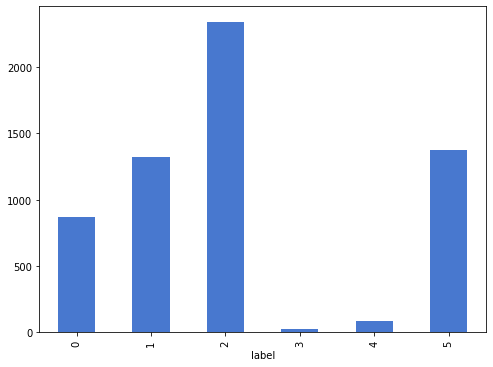

In [ ]:
fig = plt.figure(figsize=(8,6))
df_text_train.groupby('label').transcription.count().plot.bar(ylim=0)
plt.show()

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_text.transcription).toarray()

labels = df_text.label
print(features.shape)

(7523, 2309)


In [ ]:
x_test

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
5654,Ses03M_impro06_M020,2,0.001865,0.003227,0.001925,0.006962,0.030250,0.168581,0.000032,0.000036
4747,Ses03F_impro02_F032,2,0.001648,0.002250,0.001820,0.004144,0.010406,0.167436,0.000017,0.000010
7853,Ses04M_impro06_M007,2,0.004192,0.006464,0.004363,0.011763,0.085037,0.167940,0.000090,0.000153
5529,Ses03M_impro04_M004,0,0.017947,0.025606,0.018966,0.039864,0.450927,0.168577,0.001004,0.000461
1716,Ses01M_script03_1_M016,1,0.080070,0.103872,0.081055,0.149985,0.361320,0.169400,0.014253,0.018849
...,...,...,...,...,...,...,...,...,...,...
9049,Ses05M_script03_2_F040,0,0.274166,0.333596,0.278433,0.441370,0.399743,0.165289,0.136263,0.079161
5296,Ses03F_script03_1_F002,3,0.010965,0.013614,0.011308,0.019041,0.400231,0.168714,0.000289,0.000249
10015,Ses05F_impro01_M009,2,0.024757,0.031331,0.025865,0.042987,0.444424,0.169225,0.001367,0.001703
2939,Ses02F_script03_2_M034,2,0.033457,0.038380,0.034957,0.043697,0.256727,0.170352,0.001865,0.001285


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20)
# count_vect = CountVectorizer()
# x_train_counts = count_vect.fit_transform(x_train)
# tfidf_transformer = TfidfTransformer()
# x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [ ]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [ ]:
y_train = x_train['label']
y_test = x_test['label']

In [ ]:
x_train[x_train['wav_file'] == 'Ses03M_impro02_M025']

,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
4973,Ses03M_impro02_M025,2,0.008187,0.010855,0.008468,0.01664,0.53901,0.169062,0.000202,0.000147


Test Set Accuracy =  0.437
Test Set F-score =  0.248
Test Set Precision =  0.273
Test Set Recall =  0.251
Confusion matrix, without normalization
[[ 74  44  97   0   0  16]
 [ 41  57 176   0   0  43]
 [ 31  48 439   0   0  72]
 [  0   0   9   0   0   2]
 [  2   1  17   0   0   0]
 [ 17  21 211   0   0  87]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


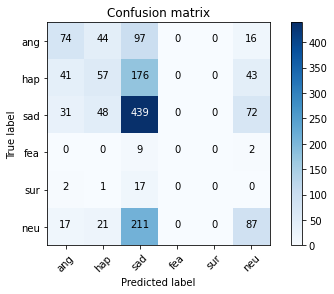

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier.fit(x_train.drop(columns=['label','wav_file']), y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test.drop(columns=['label','wav_file']))

# Results
display_results(y_test, pred_probs)

with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/text_rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
x_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_train.csv')
x_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_test.csv')

print(x_train.shape)
y_train = x_train['label']
y_test = x_test['label']

In [ ]:
print(x_train.shape, x_test.shape)
cl_weight = dict(pd.Series(x_train['label']).value_counts(normalize=True))
print(dict(pd.Series(x_train['label']).value_counts()))

#del x_train['label']
#del x_test['label']
#del x_train['wav_file']
#del x_test['wav_file']

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rf_classifier.fit(x_train, y_train)

# Predict
pred_probs = rf_classifier.predict_proba(x_test)

# Results
display_results(y_test, pred_probs)

with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/rf_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probs, f)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
x_train_cnn = x_train.drop(columns=['label','wav_file'])
x_test_cnn = x_test.drop(columns=['label','wav_file'])

In [ ]:
x_train_cnn

,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
4973,0.008187,0.010855,0.008468,0.016640,0.539010,0.169062,0.000202,0.000147
1302,0.072491,0.090118,0.074097,0.122532,0.454440,0.169127,0.010447,0.008435
1805,0.027375,0.035375,0.028102,0.050833,0.555410,0.169007,0.001753,0.002317
149,0.046962,0.066705,0.047804,0.104420,0.602200,0.169511,0.006278,0.006828
6890,0.012793,0.015674,0.013023,0.021764,0.321008,0.168405,0.000372,0.000329
...,...,...,...,...,...,...,...,...
4403,0.012898,0.018825,0.013616,0.030239,0.616305,0.169031,0.000571,0.000612
5999,0.049667,0.056282,0.051874,0.062176,0.213405,0.168587,0.003879,0.001471
5134,0.014850,0.024299,0.016224,0.040807,0.610008,0.168654,0.000965,0.000292
1470,0.021340,0.025361,0.022095,0.032109,0.419998,0.168681,0.000882,0.001801


In [ ]:
x_train_cnn = x_train_cnn.values.reshape(x_train_cnn.shape[0],x_train_cnn.shape[1],1)
x_test_cnn = x_test_cnn.values.reshape(x_test_cnn.shape[0],x_test_cnn.shape[1],1)

In [ ]:
x_train_cnn

array([[[8.18693707e-03],
        [1.08547071e-02],
        [8.46753986e-03],
        ...,
        [1.69061977e-01],
        [2.02018004e-04],
        [1.47191629e-04]],

       [[7.24911339e-02],
        [9.01175938e-02],
        [7.40974819e-02],
        ...,
        [1.69127311e-01],
        [1.04472022e-02],
        [8.43514230e-03]],

       [[2.73745952e-02],
        [3.53748600e-02],
        [2.81024164e-02],
        ...,
        [1.69007279e-01],
        [1.75319423e-03],
        [2.31690263e-03]],

       ...,

       [[1.48501060e-02],
        [2.42985845e-02],
        [1.62235381e-02],
        ...,
        [1.68654076e-01],
        [9.65311435e-04],
        [2.91668613e-04]],

       [[2.13397407e-02],
        [2.53605630e-02],
        [2.20948805e-02],
        ...,
        [1.68681011e-01],
        [8.82149563e-04],
        [1.80050440e-03]],

       [[1.34897015e-02],
        [2.42029849e-02],
        [1.39253538e-02],
        ...,
        [1.68756002e-01],
        [9.8890

In [ ]:
model = Sequential()
model.add(Conv1D(254,5,padding='same',input_shape=(x_train_cnn[0].shape))) # there are 8 features
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128,5,padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128,5,padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(6))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 8, 254)            1524      
_________________________________________________________________
activation_11 (Activation)   (None, 8, 254)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 8, 128)            162688    
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 1, 128)            82048     
_________________________________________________________________
activation_12 (Activation)   (None, 1, 128)           

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
cnn_model_hist = model.fit(x_train_cnn, y_train, batch_size=20,epochs=20, validation_data=(x_test_cnn,y_test))

Epoch 1/20
301/301 [==============================] - 7s 20ms/step - loss: 1.3826 - accuracy: 0.3966 - val_loss: 1.3533 - val_accuracy: 0.4206
Epoch 2/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3396 - accuracy: 0.4103 - val_loss: 1.3599 - val_accuracy: 0.4073
Epoch 3/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3320 - accuracy: 0.4066 - val_loss: 1.3460 - val_accuracy: 0.4199
Epoch 4/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3298 - accuracy: 0.4129 - val_loss: 1.3151 - val_accuracy: 0.4286
Epoch 5/20
301/301 [==============================] - 6s 19ms/step - loss: 1.3243 - accuracy: 0.4136 - val_loss: 1.3164 - val_accuracy: 0.4266
Epoch 6/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3202 - accuracy: 0.4204 - val_loss: 1.3160 - val_accuracy: 0.4286
Epoch 7/20
301/301 [==============================] - 6s 20ms/step - loss: 1.3190 - accuracy: 0.4126 - val_loss: 1.3418 - val_accuracy: 0.4292

In [ ]:
cnn_model_hist

In [ ]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
x_train_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_train_mfcc.csv')
x_test_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed-new/audio_test_mfcc.csv')

print(x_train_mfcc.shape)
y_train_mfcc = x_train_mfcc['label']
y_test_mfcc = x_test_mfcc['label']

(6018, 182)


In [ ]:
print(x_train_mfcc.shape, x_test_mfcc.shape)
cl_weight_mfcc = dict(pd.Series(x_train_mfcc['label']).value_counts(normalize=True))
print(dict(pd.Series(x_train_mfcc['label']).value_counts()))

#del x_train['label']
#del x_test['label']
#del x_train['wav_file']
#del x_test['wav_file']

(6018, 182) (1505, 182)
{2: 2372, 5: 1371, 1: 1286, 0: 872, 4: 83, 3: 34}


Test Set Accuracy =  0.500
Test Set F-score =  0.307
Test Set Precision =  0.342
Test Set Recall =  0.303
Confusion matrix, without normalization
[[ 87  18 109   0   0  15]
 [ 31 108 150   0   0  61]
 [ 37  36 442   0   0  44]
 [  0   2   3   0   0   1]
 [  4   4   8   0   0   8]
 [  7  23 192   0   0 115]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


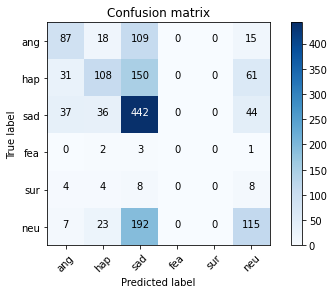

In [ ]:
rf_classifier_mfcc = RandomForestClassifier(n_estimators=1200, min_samples_split=25)
rf_classifier_mfcc.fit(x_train_mfcc.drop(columns=['wav_file','label']), y_train_mfcc)

# Predict
pred_probs_mfcc = rf_classifier_mfcc.predict_proba(x_test_mfcc.drop(columns=['wav_file','label']))

# Results
display_results(y_test_mfcc, pred_probs_mfcc)

with open('/content/drive/My Drive/IEMOCAP/pre-processed-new/rf_classifier_mfcc.pkl', 'wb') as f:
    pickle.dump(pred_probs_mfcc, f)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D,Conv2D, MaxPooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
x_train_mfcc_cnn = x_train_mfcc.drop(columns=['label','wav_file'])
x_test_mfcc_cnn = x_test_mfcc.drop(columns=['label','wav_file'])

In [ ]:
type(x_train_mfcc_cnn)

pandas.core.frame.DataFrame

In [ ]:
x_train_mfcc_cnn = x_train_mfcc_cnn.values.reshape(x_train_mfcc_cnn.shape[0],x_train_mfcc_cnn.shape[1],1)
x_test_mfcc_cnn = x_test_mfcc_cnn.values.reshape(x_test_mfcc_cnn.shape[0],x_test_mfcc_cnn.shape[1],1)

In [ ]:
x_train_mfcc_cnn

array([[[ 0.69938223],
        [-1.96401262],
        [ 0.25166201],
        ...,
        [-0.0353848 ],
        [-0.03540364],
        [-0.03541539]],

       [[ 1.77231654],
        [ 0.60048549],
        [-1.80452134],
        ...,
        [-0.0271964 ],
        [-0.02721424],
        [-0.02722518]],

       [[-0.88349785],
        [-0.02927129],
        [ 2.05666701],
        ...,
        [-0.0357663 ],
        [-0.03578407],
        [-0.03579519]],

       ...,

       [[-1.811963  ],
        [ 1.1809182 ],
        [-0.0964529 ],
        ...,
        [-0.03585737],
        [-0.03587513],
        [-0.03588624]],

       [[-0.0435452 ],
        [-0.97765974],
        [ 0.21496183],
        ...,
        [-0.03585133],
        [-0.035869  ],
        [-0.03588005]],

       [[ 1.16000059],
        [ 0.98044208],
        [-0.79670317],
        ...,
        [-0.03419319],
        [-0.03421188],
        [-0.03422356]]])

In [ ]:
model_mfcc = Sequential()
model_mfcc.add(Conv1D(254,5,padding='same',input_shape=(x_train_mfcc_cnn[0].shape))) # there are 8 features
model_mfcc.add(Activation('relu'))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Dropout(0.1))
model_mfcc.add(MaxPooling1D(pool_size=(8)))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Activation('relu'))
model_mfcc.add(Conv1D(128,5,padding='same'))
model_mfcc.add(Activation('relu'))
model_mfcc.add(Flatten())
model_mfcc.add(Dense(6))
model_mfcc.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_mfcc.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 180, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 180, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 180, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 180, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 22, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 22, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 128)           0

In [ ]:
model_mfcc.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [ ]:
cnn_model_mfcc_hist = model_mfcc.fit(x_train_mfcc_cnn, y_train_mfcc, batch_size=20,epochs=30, validation_data=(x_test_mfcc_cnn,y_test_mfcc))

Epoch 1/30
301/301 [==============================] - 37s 124ms/step - loss: 1.2040 - accuracy: 0.4998 - val_loss: 1.4087 - val_accuracy: 0.4645
Epoch 2/30
301/301 [==============================] - 37s 124ms/step - loss: 1.1619 - accuracy: 0.5224 - val_loss: 1.4024 - val_accuracy: 0.4645
Epoch 3/30
301/301 [==============================] - 38s 125ms/step - loss: 1.1267 - accuracy: 0.5427 - val_loss: 1.6223 - val_accuracy: 0.4817
Epoch 4/30
301/301 [==============================] - 38s 125ms/step - loss: 1.0778 - accuracy: 0.5656 - val_loss: 1.4428 - val_accuracy: 0.4837
Epoch 5/30
301/301 [==============================] - 37s 124ms/step - loss: 1.0295 - accuracy: 0.5894 - val_loss: 1.7817 - val_accuracy: 0.4771
Epoch 6/30
301/301 [==============================] - 37s 123ms/step - loss: 0.9784 - accuracy: 0.6070 - val_loss: 1.7374 - val_accuracy: 0.4591
Epoch 7/30
301/301 [==============================] - 37s 123ms/step - loss: 0.9148 - accuracy: 0.6391 - val_loss: 1.9744 - val_ac

In [ ]:
cnn_model_mfcc_hist

In [ ]:
### Create an output directory
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [ ]:
x_train_mfcc_cnn_2d = np.expand_dims(x_train_mfcc_cnn, -1)
x_test_mfcc_cnn_2d = np.expand_dims(x_test_mfcc_cnn, -1)

In [ ]:
x_train_mfcc_cnn_2d.shape

(6018, 180, 1, 1)

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

model_mfcc_2d = Sequential()
model_mfcc_2d.add(Conv2D(256,5,padding='same',input_shape=(180,1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_mfcc_2d.add(Activation('relu'))
model_mfcc_2d.add(Conv2D(128,5,padding='same'))
model_mfcc_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_mfcc_2d.add(Conv2D(128,5,padding='same'))
model_mfcc_2d.add(Activation('relu'))
model_mfcc_2d.add(Flatten())
model_mfcc_2d.add(Dense(6))
model_mfcc_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

# m_2d = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu')(ip)
# m_2d = tf.keras.layers.MaxPooling2D(pool_size=2)(m_2d)
# m_2d = tf.keras.layers.BatchNormalization()(m_2d)
# m_2d = tf.keras.layers.Dropout(0.2)(m_2d)
# m_2d = tf.keras.layers.Flatten()(m_2d)
# m_2d = tf.keras.layers.Dense(64, activation='relu')(m_2d)
# m_2d = tf.keras.layers.Dense(32, activation='relu')(m_2d)
# op = tf.keras.layers.Dense(6, activation='softmax')(m_2d)
# model_2d = tf.keras.Model(inputs=ip, outputs=op)
# #checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_best_only=True,
#                                                 mode='max',
#                                                 monitor='val_accuracy',
#                                                 verbose=1)

In [ ]:
model_mfcc_2d.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 180, 1, 256)       6656      
_________________________________________________________________
activation_8 (Activation)    (None, 180, 1, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 180, 1, 128)       819328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 180, 1, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 180, 1, 128)       409728    
_________________________________________________________________
activation_9 (Activation)    (None, 180, 1, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23040)            

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/cnn2d_weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_mfcc_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_mfcc_2d = model_mfcc_2d.fit(x_train_mfcc_cnn_2d, 
              y_train_mfcc,
              epochs=10,
              batch_size=32,
              validation_data=(x_test_mfcc_cnn_2d, y_test_mfcc),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/10
189/189 [==============================] - 209s 1s/step - loss: 1.1764 - accuracy: 0.5113 - val_loss: 1.2450 - val_accuracy: 0.4777
Epoch 2/10
189/189 [==============================] - 209s 1s/step - loss: 1.1241 - accuracy: 0.5351 - val_loss: 1.2953 - val_accuracy: 0.4957

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/10
189/189 [==============================] - 208s 1s/step - loss: 1.0378 - accuracy: 0.5748 - val_loss: 1.2519 - val_accuracy: 0.4924

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/10
189/189 [==============================] - 209s 1s/step - loss: 1.0067 - accuracy: 0.5934 - val_loss: 1.2565 - val_accuracy: 0.4957

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


In [ ]:
x_train_mfcc_cnn_2d = np.expand_dims(x_train_mfcc_cnn, -1)
x_test_mfcc_cnn_2d = np.expand_dims(x_test_mfcc_cnn, -1)

In [ ]:
x_train_mfcc_cnn_2d.shape

(6018, 180, 1, 1)

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

In [ ]:
ip

<KerasTensor: shape=(None, 180, 1) dtype=float32 (created by layer 'input_9')>

In [ ]:
ip = tf.keras.layers.Input(shape=x_train_mfcc_cnn[0].shape)

m_2d = tf.keras.layers.Conv2D(256, kernel_size=1, activation='relu',input_shape = (180,1))
m_2d = tf.keras.layers.MaxPooling2D(pool_size=2)(m_2d)
m_2d = tf.keras.layers.BatchNormalization()(m_2d)
m_2d = tf.keras.layers.Dropout(0.2)(m_2d)
m_2d = tf.keras.layers.Flatten()(m_2d)
m_2d = tf.keras.layers.Dense(64, activation='relu')(m_2d)
m_2d = tf.keras.layers.Dense(32, activation='relu')(m_2d)
op = tf.keras.layers.Dense(6, activation='softmax')(m_2d)
model_2d = tf.keras.Model(inputs=ip, outputs=op)
#checkpoint_path = "cp.ckpt"
# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_best_only=True,
#                                                 mode='max',
#                                                 monitor='val_accuracy',
#                                                 verbose=1)

TypeError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/cnn2d_weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_2d.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_cnn_2d = model_2d.fit(x_train_mfcc_cnn, 
          y_train_mfcc,
          epochs=2,
          batch_size=32,
          validation_data=(x_test_mfcc_cnn, y_test_mfcc),
          callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [ ]:
### BERT

In [ ]:
### BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 4.0 MB/s 
     |████████████████████████████████| 636 kB 47.2 MB/s 
     |████████████████████████████████| 895 kB 61.0 MB/s 
     |████████████████████████████████| 3.3 MB 36.0 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install --quiet shap==0.39

     |████████████████████████████████| 356 kB 4.0 MB/s 


In [ ]:
pip import shap

ERROR: unknown command "import"


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model_bert = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
df_text_train

,label,transcription
0,2,they want me there two years but i could proba...
1,1,laughter
2,2,they didn t die they killed themselves for eac...
3,2,how do you know he s even thinking about it ?
4,5,i don t know are you like i don t know . are y...
...,...,...
6013,1,i m so stupid . i m like a little kid . i it s...
6014,2,they sting .
6015,5,fuck boston .
6016,2,the national guard is i guess really spread th...


In [ ]:

max_val = 0
for sent in (df_text_train['transcription'].tolist() + df_text_train['transcription'].tolist() + df_text_test['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-cased'

In [ ]:
MAX_LENGTH = 114

tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

In [ ]:
X_train_text = tokenize(df_text_train['transcription'], tokenizer)
X_test_text = tokenize(df_text_test['transcription'], tokenizer)
X_val_text = tokenize(df_text_test['transcription'], tokenizer)

100%|██████████| 1505/1505 [00:00<00:00, 2261.49it/s]


In [ ]:
## Creating an entry

In [ ]:
config = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config)

input_ids_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer = DistilBERT(input_ids = input_ids_in, attention_mask = input_masks_in)[0]
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(6, activation='softmax')(X)

model_bert_local = tf.keras.Model(inputs=[input_ids_in, input_masks_in], outputs = X)

for layer in model_bert_local.layers[:3]:
    layer.trainable = False

model_bert_local.summary()

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_3 (TFDisti TFBaseModelOutput(la 65190912    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_3[0][1

In [ ]:

### Create an output directory
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model_checkpoint = ModelCheckpoint(filepath=output_dir+'/weights.{epoch:02d}.hdf5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_train_text = df_text_train['label']
y_test_text = df_text_test['label']

In [ ]:

model_bert_local.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_bert_local.fit(X_train_text, 
                    y_train_text, 
                    epochs = 1,
                    batch_size=16, 
                    validation_data=(X_test_text, y_test_text), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

377/377 [==============================] - 1758s 5s/step - loss: 1.3095 - accuracy: 0.4430 - val_loss: 1.1854 - val_accuracy: 0.5043


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

plot_history(history)

In [ ]:
y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))

In [ ]:
tokenized = batch_1[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True))) ???

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model_bert(input_ids, attention_mask=attention_mask)

In [ ]:
path = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/Session1/sentences/wav/'
my_list = []
for subdir,dir,files in os.walk(path):
  for file in files:
    try:
      X, sample_rate = librosa.load(os.path.join(subdir,file), res_type = 'kaiser_fast')
      xfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
      file = int(file[6:8])
      arr = xfccs, file 
      my_list.append(arr)
    except ValueError or NoBackendError :
      continue